# Индекс доступа к здоровым активам и рискам (AHAH-индекс). Ливерпуль

Ссылка на курс "Геопространственный анализ данных":\
https://darribas.org/gds_course/content/home.html

Ссылка на книгу "Геопространственный анализ данных":\
https://geographicdata.science/book/intro.html

Часть D\
https://darribas.org/gds_course/content/bD/diy_D.html

**Описание данных:**

Индекс доступа к здоровым активам и рискам (Access to Healthy Assets and Hazards (AHAH) index) — это оценка, которая ранжирует LSOA (статистическая единица Ливерпуля) в зависимости от близости окружающей среды, которая может быть положительной для здоровья и расценена как актив или отрицательной — опасность. Полученное число дает нам представление о том, насколько «нездоровой» является среда LSOA. Чем выше балл, тем менее здоровой считается территория.

**Задачи проекта:**

*Задание 1. Создание карт-хороплет с AHAH-индексом*

Создать следующие картограммы, дополнив их рисунком, отображающим распределение значений с помощью KDE:

*   Равные интервалы с пятью классами;
*   Квантили с пятью классами;
*   Фишер-Дженкс с пятью классами;
*   Уникальные значения со следующими условиями:
   *   Разделить LSOA на два класса — выше и ниже среднего балла AHAH;
   *   Присвоить качественные отметки ("выше" или "ниже") каждому LSOA;
   *   Создать карту с уникальными значениями для созданных выше отметок.

*Задание 2. Масштабирование карт*

Создать слудующие карты:

*   Увеличить масштаб центра Ливерпуля с одинаковым отображением цвета всех LSOA;
*   Карта с отображением индекса AHAH разбитого на квантили по всему Ливерпулю, увеличенная к северу от центра города;
*   Увеличить часть города к северу от центра с отображением индекса AHAH разбитого на квантили только для этой части города.

## Этап 1. Загрузка данных и подготовка их к анализу

In [ ]:
# Установим библиотеку 'pysal'
! pip install pysal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.4/132.4 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.8/277.8 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.8/331.8 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 45.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Установим библиотеку 'contextily'
! pip install contextily

In [ ]:
# Импортируем библиотеки
import pandas as pd
import geopandas as gpd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import contextily as cx

from pysal.lib import examples
from pysal.viz import mapclassify

In [ ]:
# Из библиотеки google.colab импортируем класс files
from google.colab import files

In [ ]:
# Создаем объект этого класса, применяем метод .upload()
uploaded = files.upload()

Saving E08000012.csv to E08000012.csv


In [ ]:
# Настроим отображение максимального количества колонок
pd.set_option('display.max_columns', None)

### LSOA

In [ ]:
# Извлечем данные с полигонами
lsoas = gpd.read_file('/content/E08000012.shp')
lsoas.sample(n=3, random_state=None)

,lsoa11cd,geometry
134,E01006659,"POLYGON ((338662.178 396341.066, 338678.000 39..."
121,E01006644,"POLYGON ((341389.602 393304.803, 341381.994 39..."
222,E01006753,"POLYGON ((343399.200 382811.899, 343398.878 38..."


### AHAH-индекс

In [ ]:
# Извлечем данные с индексом
ahah_data = pd.read_csv('/content/E08000012.csv')
ahah_data.sample(n=3, random_state=None)

,lsoa11cd,lsoa11nm,r_rank,h_rank,g_rank,e_rank,r_exp,h_exp,g_exp,e_exp,ahah,r_ahah,d_ahah,r_dec,h_dec,g_dec,e_dec,gpp_dist,ed_dist,dent_dist,pharm_dist,gamb_dist,ffood_dist,pubs_dist,leis_dist,blue_dist,off_dist,tobac_dist,green_pas,green_act,ur,no2_mean,pm10_mean,so2_mean,d_gpp_dist,d_ed_dist,d_pharm_dist,d_dent_dist,d_gamb_dist,d_ffood_dist,d_pubs_dist,d_leis_dist,d_blue_dist,d_off_dist,d_tobac_dist,d_green_pas,d_green_act,d_no2_mean,d_pm10_mean,d_so2_mean
132,E01006657,Liverpool 002C,37319,2265,17752,33989,49.299314,1.266503,12.525114,37.479596,25.142632,29794,8,9,1,5,9,0.430435,2.073478,0.426087,0.353913,0.371304,0.675217,0.683478,1.623043,2.650435,0.753478,0.742609,0.579727,0.45,1,13.877524,11.081892,1.878024,1,1,1,1,10,8,8,4,7,9,10,3,5,8,4,10
224,E01006755,Liverpool 059C,19175,11639,28172,34873,13.899979,7.406290,25.248686,40.074113,21.657267,23335,6,5,3,7,9,0.456286,12.692286,0.532000,0.488286,0.852000,0.852000,2.215143,3.844857,2.217714,1.917143,4.916000,0.064811,0.39,1,12.846954,11.202924,2.077395,1,7,2,2,7,7,3,7,6,6,3,9,4,7,4,10
151,E01006676,Liverpool 044D,23830,7512,19630,34195,19.075673,4.499675,14.357514,38.058573,18.997859,17316,5,6,2,5,9,0.882188,3.603750,0.993437,0.346250,0.649062,1.621875,1.560000,1.306250,2.625938,1.703125,2.051875,0.234434,0.33,1,14.052680,10.859635,1.919788,4,2,1,5,8,4,4,3,7,7,7,6,3,8,4,10


In [ ]:
# Присоединим к датасету с LSOA датасет с AHAH
ahah = lsoas.join(ahah_data.set_index("lsoa11cd"), on="lsoa11cd")
ahah.sample(n=3, random_state=None)

,lsoa11cd,geometry,lsoa11nm,r_rank,h_rank,g_rank,e_rank,r_exp,h_exp,g_exp,e_exp,ahah,r_ahah,d_ahah,r_dec,h_dec,g_dec,e_dec,gpp_dist,ed_dist,dent_dist,pharm_dist,gamb_dist,ffood_dist,pubs_dist,leis_dist,blue_dist,off_dist,tobac_dist,green_pas,green_act,ur,no2_mean,pm10_mean,so2_mean,d_gpp_dist,d_ed_dist,d_pharm_dist,d_dent_dist,d_gamb_dist,d_ffood_dist,d_pubs_dist,d_leis_dist,d_blue_dist,d_off_dist,d_tobac_dist,d_green_pas,d_green_act,d_no2_mean,d_pm10_mean,d_so2_mean
67,E01006584,"POLYGON ((340494.847 390680.010, 340495.334 39...",Liverpool 034E,28851,23398,35713,33848,26.383515,18.543226,42.844242,37.091544,31.215632,36545,9,7,6,9,9,0.976818,5.974091,1.190000,1.493182,0.677727,1.400909,0.660909,2.501818,4.769545,1.632727,1.857727,0.123042,0.605,1,14.374863,11.340330,1.781723,5,4,8,6,8,5,8,6,9,7,7,7,7,8,4,10
30,E01006544,"POLYGON ((337021.000 393061.000, 337020.385 39...",Liverpool 015C,36533,4652,7560,36171,45.914045,2.681291,4.531454,44.508099,24.408722,28609,7,9,2,2,9,0.632857,3.712500,0.573929,0.410357,0.525000,0.340357,0.952500,0.989643,1.847500,0.463929,1.432857,1.211039,0.410,1,14.714507,11.386194,1.962571,3,2,2,2,9,10,6,2,5,10,8,1,5,9,4,10
286,E01033757,"POLYGON ((335859.000 389756.000, 335867.000 38...",Liverpool 037E,35663,1420,35527,36160,42.669677,0.785818,42.201456,44.466694,32.530911,37452,9,9,1,9,9,0.395000,2.260556,0.426111,0.283333,0.902778,0.652778,0.396111,1.289444,3.374444,0.661111,1.120556,0.070149,0.600,1,15.576729,11.110463,1.953305,1,1,1,1,7,8,9,3,8,9,9,9,7,9,4,10


## Этап 2. Ответы на вопросы исследования

### Задание 1. Создание карт-хороплет с AHAH-индексом

Создать следующие картограммы, дополнив их рисунком, отображающим распределение значений с помощью KDE:

*   Равные интервалы с пятью классами;
*   Квантили с пятью классами;
*   Фишер-Дженкс с пятью классами;
*   Уникальные значения со следующими условиями:
   *   Разделить LSOA на два класса — выше и ниже среднего балла AHAH-индекса;
   *   Присвоить качественные отметки ("выше" или "ниже") каждому LSOA;
   *   Создать карту с уникальными значениями, используя созданные качественные значения.

In [ ]:
# Получим общую информацию о таблице
ahah.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 51 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   lsoa11cd      298 non-null    object  
 1   geometry      298 non-null    geometry
 2   lsoa11nm      298 non-null    object  
 3   r_rank        298 non-null    int64   
 4   h_rank        298 non-null    int64   
 5   g_rank        298 non-null    int64   
 6   e_rank        298 non-null    int64   
 7   r_exp         298 non-null    float64 
 8   h_exp         298 non-null    float64 
 9   g_exp         298 non-null    float64 
 10  e_exp         298 non-null    float64 
 11  ahah          298 non-null    float64 
 12  r_ahah        298 non-null    int64   
 13  d_ahah        298 non-null    int64   
 14  r_dec         298 non-null    int64   
 15  h_dec         298 non-null    int64   
 16  g_dec         298 non-null    int64   
 17  e_dec         298 non-null    int64   
 18  gp

In [ ]:
# Проверим систему координат
ahah.crs

<Projected CRS: PROJCS["Transverse_Mercator",GEOGCS["GCS_OSGB 1936 ...>
Name: Transverse_Mercator
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: Ordnance_Survey_of_Great_Britain_1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

#### Равные интервалы

In [ ]:
# Посмотрим на уникальные значения в столбце 'ahah'
# ahah['ahah'].unique()

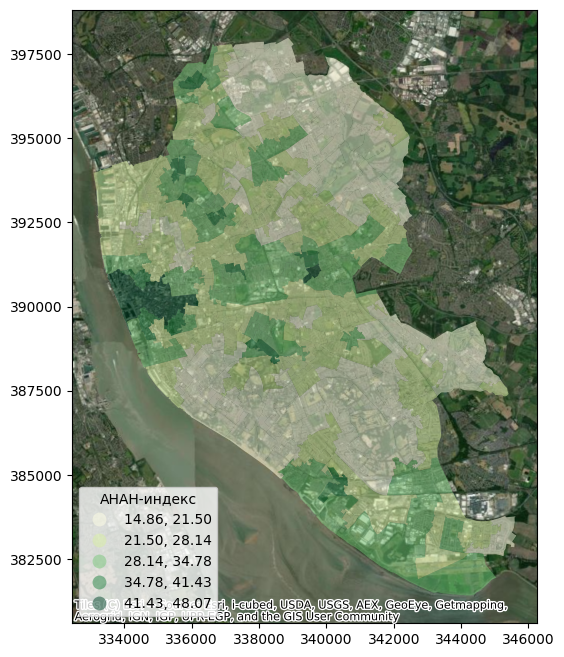

In [ ]:
# Создадим картограмму с классификацией "Равных интервалов", состоящей из пяти классов
f, ax = plt.subplots(1, figsize=(6, 8))
ax = ahah.plot(
    ax=ax,
    column="ahah",
    scheme="equal_interval",
    k=5,
    cmap="YlGn",
    legend=True,
    legend_kwds={'loc':'lower left', 'title':'AHAH-индекс'},
    alpha = 0.5
)
# ax.set_axis_off()
cx.add_basemap(
    ax=ax,
    crs=ahah.crs,
    source=cx.providers.Esri.WorldImagery
    # alpha=0.7
)
plt.show();

In [ ]:
# Классифицируем диапазон значений исходя из равных интервалов
classi = mapclassify.EqualInterval(ahah['ahah'], k=5)
classi

EqualInterval

   Interval      Count
----------------------
[14.86, 21.50] |    93
(21.50, 28.14] |   110
(28.14, 34.78] |    72
(34.78, 41.43] |    16
(41.43, 48.07] |     7

In [ ]:
# Определим крайние правые значения интервалов
classi.bins

array([21.50255012, 28.14376436, 34.7849786 , 41.42619283, 48.06740707])

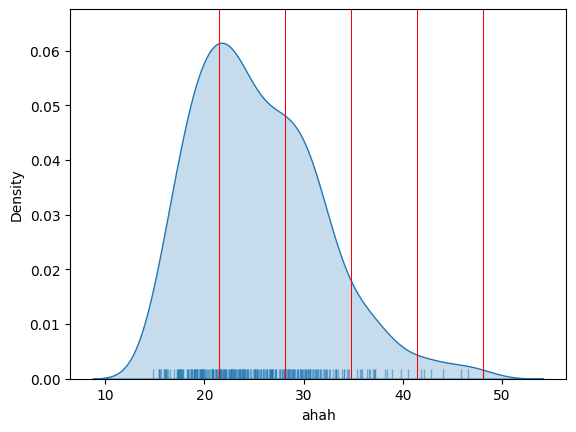

In [ ]:
# Построим график с отображением распределения значений и правыми границами интервалов
f, ax = plt.subplots(1)
sns.kdeplot(ahah['ahah'], fill=True)
sns.rugplot(ahah['ahah'], alpha=0.5)
for cut in classi.bins:
  plt.axvline(cut, color='red', linewidth=0.75)
plt.show();

**Вывод:**
*   Ключевая особенность классификации по равным интервалам — размер интервалов распределяется на основе величины значений, независимо от того, сколько наблюдений в результате этого попадает в каждую ячейку;
*   Распределение значений имеет правостороннюю ассиметрию, что говорит о наличии ячеек с большим количеством наблюдений слева, то есть с меньшими значениями. В то время как ячейки с большими значениями имеют лишь несколько выбросов;
*   В связи с этим, на карте выше AHAH-индекс имеет высокие значения преимущественно в центральной части города (там, где состредоточена самая высокая плотность застройки), что говорит о неготивном влиянии окружающей среды; более низкие значения распределены ближе к окраинам города (там, где плотность застройки ниже) — на северо-востоке города и южнее центра, что имеет положительное влияние на здоровье и может расцениваться как актив.

#### Квантили

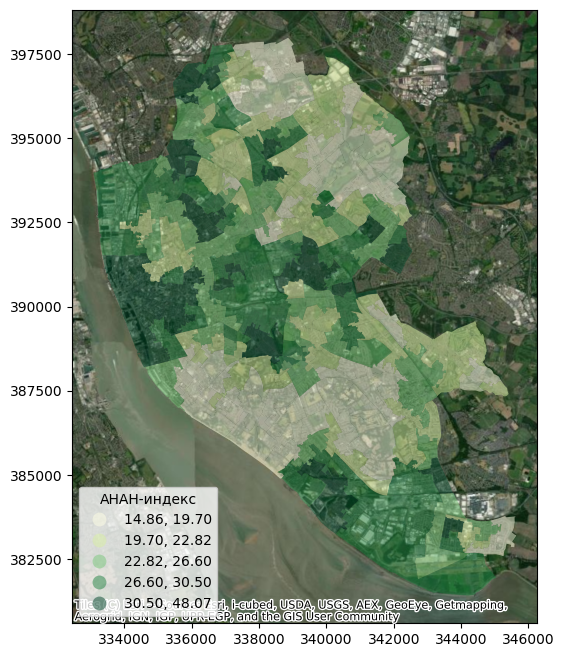

In [ ]:
# Создадим картограмму с классификацией "Квантиль", состоящую из пяти классов
f, ax = plt.subplots(1, figsize=(6, 8))
ax = ahah.plot(
    ax=ax,
    column="ahah",
    scheme="quantiles",
    k=5,
    cmap="YlGn",
    legend=True,
    legend_kwds={'loc':'lower left', 'title':'AHAH-индекс'},
    alpha=0.5
)
# ax.set_axis_off()
cx.add_basemap(
    ax=ax,
    crs=ahah.crs,
    source=cx.providers.Esri.WorldImagery
    # alpha=0.7
)
plt.show();

In [ ]:
# Классифицируем диапазон значений по квантилям
classi = mapclassify.Quantiles(ahah['ahah'], k=5)
classi

Quantiles

   Interval      Count
----------------------
[14.86, 19.70] |    60
(19.70, 22.82] |    59
(22.82, 26.60] |    60
(26.60, 30.50] |    59
(30.50, 48.07] |    60

In [ ]:
# Определим крайние правые значения интервалов
classi.bins

array([19.69926045, 22.81557793, 26.59809157, 30.50220666, 48.06740707])

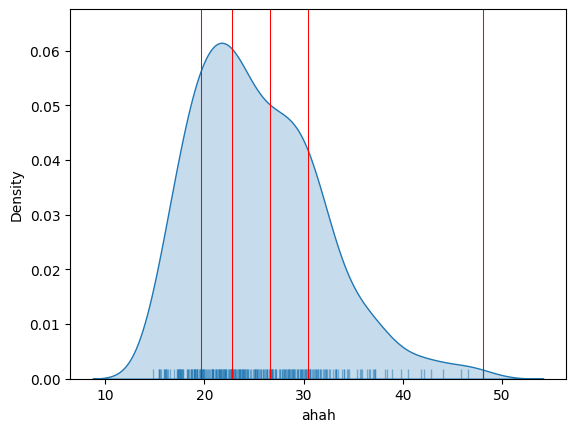

In [ ]:
# Построим график с отображением распределения значений и правыми границами интервалов
f, ax = plt.subplots(1)
sns.kdeplot(ahah['ahah'], fill=True)
sns.rugplot(ahah['ahah'], alpha=0.5)
for cut in classi.bins:
  plt.axvline(cut, color='red', linewidth=0.75)
plt.show();

**Вывод:**
*   Ключевая особенность классификации по квантилям —  одинаковое количество значений по каждому интервалу;
*   Распределение значений имеет правостороннюю ассиметрию, что говорит о наличии ячеек с большим количеством наблюдений слева, то есть с меньшими значениями. В то время как ячейки с большими значениями имеют лишь несколько выбросов;
*   В связи с этим, на карте выше AHAH-индекс имеет высокие значения преимущественно в тех частях города, где состредоточена наиболее высокая плотность застройки, что говорит о неготивном влиянии окружающей среды; более низкие значения распределены ближе к окраинам города (там, где плотность застройки ниже), что имеет положительное влияние на здоровье и может расцениваться как актив.

#### Фишер-Дженкс (естественные интервалы)

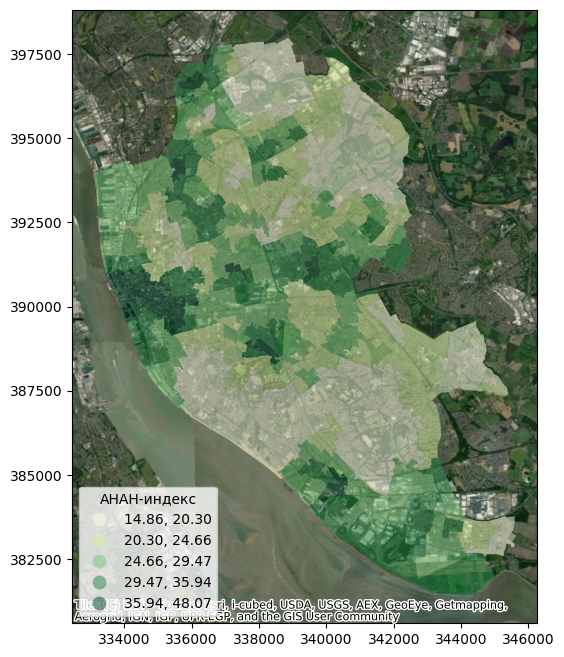

In [ ]:
# Создадим картограмму с классификацией "Фишер-Дженкс", состоящую из пяти классов
f, ax = plt.subplots(1, figsize=(6,8))
ax = ahah.plot(
    ax=ax,
    column="ahah",
    scheme='fisher_jenks',
    cmap="YlGn",
    k=5,
    legend=True,
    legend_kwds={'loc':'lower left', 'title':'AHAH-индекс'},
      alpha=0.5
)
# ax.set_axis_off()
cx.add_basemap(
    ax=ax,
    crs=ahah.crs,
    source=cx.providers.Esri.WorldImagery
    # alpha=0.7
)
plt.show();

In [ ]:
# Классифицируем диапазон значений по естественным разрывам
classi = mapclassify.FisherJenks(ahah['ahah'], k=5)
classi

FisherJenks

   Interval      Count
----------------------
[14.86, 20.30] |    72
(20.30, 24.66] |    82
(24.66, 29.47] |    69
(29.47, 35.94] |    56
(35.94, 48.07] |    19

In [ ]:
# Определим крайние правые значения интервалов
classi.bins

array([20.2955032 , 24.66388469, 29.46958638, 35.94083661, 48.06740707])

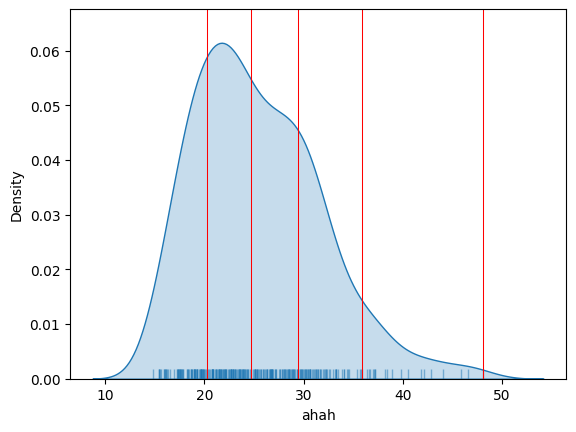

In [ ]:
# Построим график с отображением распределения значений и правыми границами интервалов
f, ax = plt.subplots(1)
sns.kdeplot(ahah['ahah'], fill=True)
sns.rugplot(ahah['ahah'], alpha=0.5)
for cut in classi.bins:
  plt.axvline(cut, color='red', linewidth=0.75)
plt.show();

**Вывод:**
*   Ключевая особенность классификации по естественным интервалам —  это минимизация различий внутри каждой ячейки и максимизация различий между различными классами;
*   Распределение значений имеет правостороннюю ассиметрию, что говорит о наличии ячеек с большим количеством наблюдений слева, то есть с меньшими значениями. В то время как ячейки с большими значениями имеют лишь несколько выбросов;
*   В связи с этим, на карте выше AHAH-индекс имеет высокие значения преимущественно в тех частях города, где состредоточена наиболее высокая плотность застройки — на западе, в центре города и на его юге, что говорит о неготивном влиянии окружающей среды; более низкие значения распределены южнее центра города и на его северо-востоке (там, где плотность застройки ниже), что имеет положительное влияние на здоровье и может расцениваться как актив.

#### Уникальные значения

In [ ]:
# Разделим LSOA на два класса — "выше" и "ниже" среднего балла AHAH
ahah['ahah_status'] = np.where(
    ahah['ahah'] > np.mean(ahah['ahah']),
    'выше',
    'ниже'
)
# Проверим правильность выполнения функции
ahah[['ahah','ahah_status']].sample(n=5, random_state=None)

,ahah,ahah_status
284,39.830065,выше
106,18.937505,ниже
283,35.830340,выше
243,19.516784,ниже
187,37.248226,выше


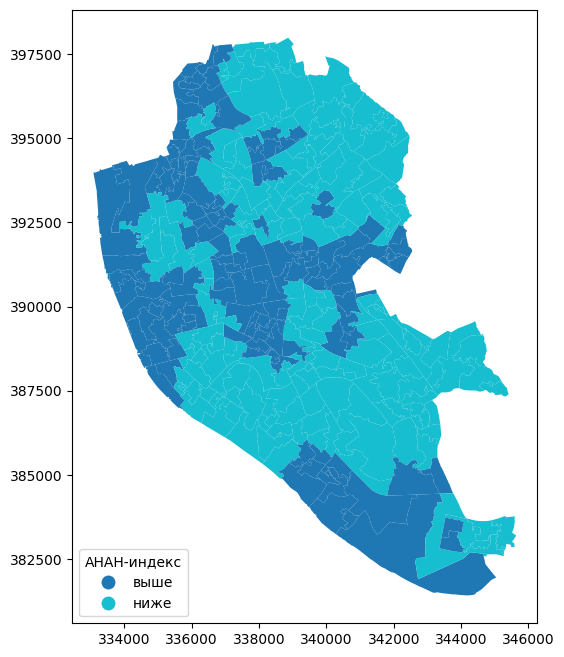

In [ ]:
# Создадим картограмму на основе уникальных значений, используя созданные выше качественные значения
f, ax = plt.subplots(1, figsize=(6,8))
ax = ahah.plot(
    ax=ax,
    column="ahah_status",
    categorical=True,
    # cmap="YlGn",
    legend=True,
    legend_kwds={'loc':'lower left', 'title':'AHAH-индекс'}
)
# ax.set_axis_off()
plt.show();

**Вывод:**
*   Для построения картограммы с отображением категориальных переменных, были использованы уникальные качественные значения — два класса — "выше" и "ниже" относительно среднего балла AHAH;
*   В связи с этим, на карте выше AHAH-индекс имеет высокие значения преимущественно в тех частях города, где состредоточена наиболее высокая плотность застройки — на западе, в центре города и на его юге, что говорит о неготивном влиянии окружающей среды в этих зонах; более низкие значения распределены южнее центра города и на его северо-востоке (там, где плотность застройки ниже), что имеет положительное влияние на здоровье и может расцениваться как актив.

### Задание 2. Увеличение масштаба карт

Создать слудующие карты:

*   Увеличить масштаб центра Ливерпуля с одинаковым отображением цвета всех LSOA;
*   Карта с отображением индекса AHAH разбитого на квантили по всему Ливерпулю, увеличенная к северу от центра города;
*   Увеличить часть города к северу от центра с отображением индекса AHAH разбитого на квантили только для этой части города.

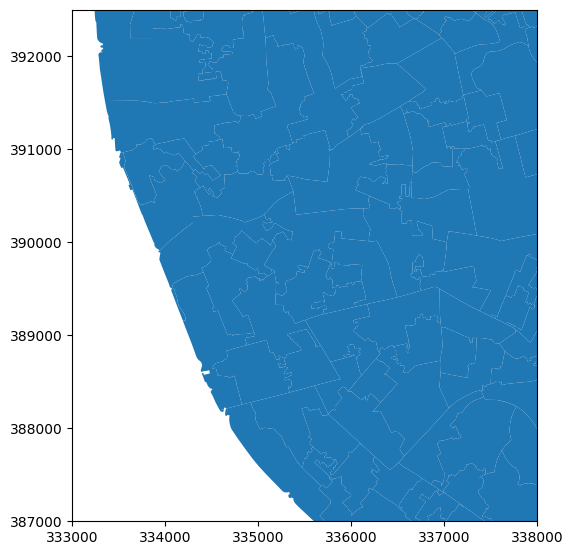

In [ ]:
# Создадим карту центра Ливерпуля с одинаковым отображением цвета всех LSOA
f, ax = plt.subplots(1, figsize=(6,8))
ax = ahah.plot(
    ax=ax
)
ax.set_ylim(387000, 392500)
ax.set_xlim(333000,338000)
plt.show();

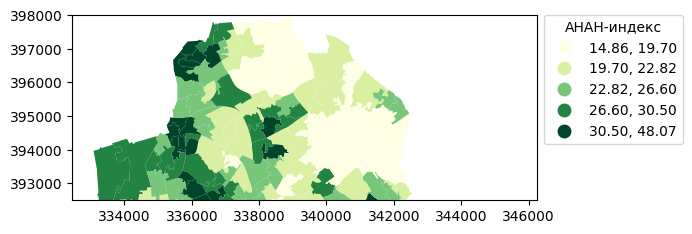

In [ ]:
# Создадим карту с отображением индекса AHAH разбитого на квантили по всему Ливерпулю,
# увеличенную к северу от центра города
f, ax = plt.subplots(1, figsize=(6, 8))
ax = ahah.plot(
    ax=ax,
    column="ahah",
    scheme="quantiles",
    k=5,
    cmap="YlGn",
    legend=True,
    legend_kwds={'loc':'upper left', 'title':'AHAH-индекс', 'bbox_to_anchor':(1,1.04)}
)
# ax.set_axis_off()
ax.set_ylim(392500, 398000)
# ax.set_xlim(333000,338000)
plt.show();

<Axes: >

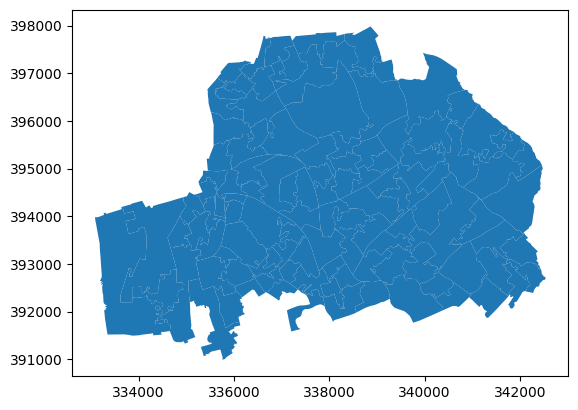

In [ ]:
subset = ahah.cx[:, 392500:398000]
subset.plot()

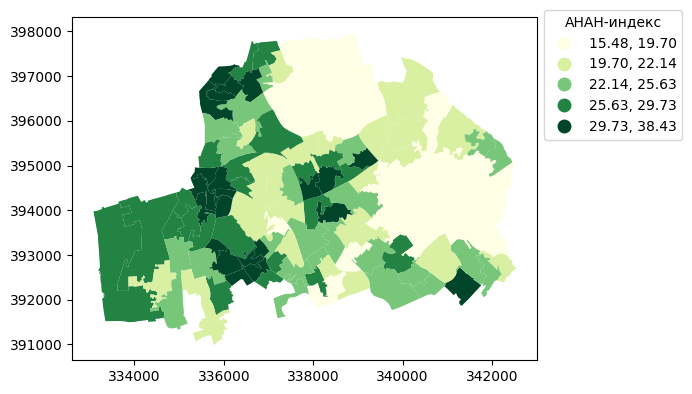

In [ ]:
# Создадим карту северной части города с отображением индекса AHAH разбитого на квантили по всему Ливерпулю
f, ax = plt.subplots(1, figsize=(6, 8))
ax = subset.plot(
    ax=ax,
    column="ahah",
    scheme="quantiles",
    k=5,
    cmap="YlGn",
    legend=True,
    legend_kwds={'loc':'upper left', 'title':'AHAH-индекс', 'bbox_to_anchor':(1,1.04)}
)
# ax.set_axis_off()
plt.show();

**Вывод:**
*   Был сделан ряд следующих карт (с использованием масштабирования):
   *   Карта с увеличенным масштабом центра Ливерпуля с одинаковым отображением цвета всех LSOA;
   *   Карта с отображением индекса AHAH разбитого на квантили по всему Ливерпулю, увеличенная к северу от центра города;
   *   Карта с увеличенной частью города к северу от центра с отображением индекса AHAH разбитого на квантили только для этой части города.

## Этап 3. Результаты исследования

### Выводы

1.   Были созданы карты-хороплеты с AHAH-индексом, а также графики, отображающие распределение значений с помощью KDE:
   *   Равные интервалы с пятью классами:
      *   Ключевая особенность классификации по равным интервалам — размер интервалов распределяется на основе величины значений, независимо от того, сколько наблюдений в результате этого попадает в каждую ячейку;
      *   Распределение значений имеет правостороннюю ассиметрию, что говорит о наличии ячеек с большим количеством наблюдений слева, то есть с меньшими значениями. В то время как ячейки с большими значениями имеют лишь несколько выбросов;
      *   В связи с этим, на карте выше AHAH-индекс имеет высокие значения преимущественно в центральной части города (там, где состредоточена самая высокая плотность застройки), что говорит о неготивном влиянии окружающей среды; более низкие значения распределены ближе к окраинам города (там, где плотность застройки ниже) — на северо-востоке города и южнее центра, что имеет положительное влияние на здоровье и может расцениваться как актив;
   *   Квантили с пятью классами:
      *   Ключевая особенность классификации по квантилям —  одинаковое количество значений по каждому интервалу;
      *   Распределение значений имеет правостороннюю ассиметрию, что говорит о наличии ячеек с большим количеством наблюдений слева, то есть с меньшими значениями. В то время как ячейки с большими значениями имеют лишь несколько выбросов;
      *   В связи с этим, на карте выше AHAH-индекс имеет высокие значения преимущественно в тех частях города, где состредоточена наиболее высокая плотность застройки, что говорит о неготивном влиянии окружающей среды; более низкие значения распределены ближе к окраинам города (там, где плотность застройки ниже), что имеет положительное влияние на здоровье и может расцениваться как актив;
   *   Фишер-Дженкс с пятью классами:
      *   Ключевая особенность классификации по естественным интервалам —  это минимизация различий внутри каждой ячейки и максимизация различий между различными классами;
      *   Распределение значений имеет правостороннюю ассиметрию, что говорит о наличии ячеек с большим количеством наблюдений слева, то есть с меньшими значениями. В то время как ячейки с большими значениями имеют лишь несколько выбросов;
      *   В связи с этим, на карте выше AHAH-индекс имеет высокие значения преимущественно в тех частях города, где состредоточена наиболее высокая плотность застройки — на западе, в центре города и на его юге, что говорит о неготивном влиянии окружающей среды; более низкие значения распределены южнее центра города и на его северо-востоке (там, где плотность застройки ниже), что имеет положительное влияние на здоровье и может расцениваться как актив;
   *   Уникальные значения:
      *   Для построения картограммы с отображением категориальных переменных, были использованы уникальные качественные значения — два класса — "выше" и "ниже" относительно среднего балла AHAH-индекса;
      *   В связи с этим, на карте выше AHAH-индекс имеет высокие значения преимущественно в тех частях города, где состредоточена наиболее высокая плотность застройки — на западе, в центре города и на его юге, что говорит о неготивном влиянии окружающей среды в этих зонах; более низкие значения распределены южнее центра города и на его северо-востоке (там, где плотность застройки ниже), что имеет положительное влияние на здоровье и может расцениваться как актив;

2.   Был сделан ряд следующих карт (с использованием масштабирования):
   *   Карта с увеличенным масштабом центра Ливерпуля с одинаковым отображением цвета всех LSOA;
   *   Карта с отображением индекса AHAH разбитого на квантили по всему Ливерпулю, увеличенная к северу от центра города;
   *   Карта с увеличенной частью города к северу от центра с отображением индекса AHAH разбитого на квантили только для этой части города.

